# AST1420 Galactic Structure & Dynamics - Final Exam

## Emaad Paracha - 1003687236

## 0. Importing Dependencies

In [1]:
import matplotlib.pyplot as plt
import math
from galpy.orbit import Orbit
from astropy import io
import astropy.units as u
import astropy.constants as const
from galpy import potential
from scipy import integrate
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.misc import derivative
from galpy.potential import MWPotential2014
from galpy.potential import NFWPotential
import numpy as np
from IPython.display import Image
import scipy.optimize as opt
from galpy.potential import evaluatePotentials
from scipy.spatial import ConvexHull
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore") #Not ideal, I just wanted to make the notebook cleaner

## Question 1 - Short Questions


### Part a

In class, we discussed the NFW and Hernquist members of the family of two-power density models. Another commonly used member of this family is the Jaffe profile, which can be used to describe the light and mass profile of cuspy elliptical galaxies. The density of the Jaffe profile is
\begin{equation}
  \rho(r) = \frac{\rho_0\,a^2}{r^2\,(1+r/a)^2}\,.
\end{equation}
For this profile, compute the enclosed mass as a function of $r/a$, determine the total mass $M$ in terms of $\rho_0$ and $a$, and compute the gravitational potential and circular velocity as a function of $r/a$, expressing these in terms of $(M,a)$ rather than $(\rho_0,a)$.


#### Answer

#### Mass Enclosed:

Since we have the density profile, we can compute the mass enclosed as:

$$M(< r) = \int_{0}^{r} 4\pi r^{2} \rho(r) \,dr$$

Where we can substitute the Jaffe profile:

$$M(< r) = \int_{0}^{r} 4\pi r^{2} \frac{\rho_0 a^2}{r^2 (1+r/a)^2} \,dr$$

This simplifies to:

$$M(< r) = 4 \pi \rho_0 a^2 \int_{0}^{r} \frac{1}{(1+r/a)^2} \,dr$$

Solving the integral, we have:

$$M(< r) = 4 \pi \rho_0 a^2 \left[ \frac{-a}{(1+r/a)}\right]^{r}_0$$

Plugging in the values:

$$M(< r) = 4 \pi \rho_0 a^2 \left( \frac{-a}{(1+r/a)} + a \right)$$

Rearranging:

$$M(< r) = 4 \pi \rho_0 a^2 \left( \frac{-a}{(1+r/a)} + a \right)$$

Bringing the $a$ out of the parentheses:

$$M(< r) = 4 \pi \rho_0 a^3 \left( 1 - \frac{1}{(1+r/a)} \right)$$

Which we can then finally rearrange to get:

$$\boxed{M(< r) = 4 \pi \rho_0 a^3 \left(\frac{r/a}{(1+r/a)} \right)}$$

#### Total Mass

Taking the unrearranged form from above:

$$M(< r) = 4 \pi \rho_0 a^3 \left( 1 - \frac{1}{(1+r/a)} \right)$$

If we let $r \rightarrow \infty$, we see that the $\frac{1}{(1+r/a)}$ term goes to 0. Therefore, for total mass, $M$, we have:

$$\boxed{M = 4 \pi \rho_0 a^3}$$

#### Gravitational Potential

From the notes, the formula for gravitational potential is:

$$\Phi(r) = -G \int_{r}^{\infty} \frac{M(<r^{'})}{r^{'2}} \,dr^{'} $$

Substituting the value for $M(< r)$, we get:

$$\Phi(r) = -G 4 \pi \rho_0 a^3 \int_{r}^{\infty} \frac{r^{'}/a}{1+ r^{'}/a} \frac{1}{r^{'2}} \,dr^{'} $$

Which can then be rearranged to:

$$\Phi(r) = -G 4 \pi \rho_0 a^2 \int_{r}^{\infty} \frac{1}{r^{'}(1+ r^{'}/a)} \,dr^{'} $$

Integrating this, we get:

$$\Phi(r) = -G 4 \pi \rho_0 a^2 \left(\ln\left(\frac{r + a}{a}\right)\right) $$

Substituting the value we have for $M$ ad rearranging the $\ln$ term, we get:

$$\boxed{\Phi(r) = \frac{-GM}{a} \left(\ln\left(1 + \frac{a}{r}\right)\right) = \frac{-GM}{a} \left(\ln\left(1 + \left(\frac{r}{a}\right)^{-1} \right)\right)}$$




#### Circular Velocity

We have the formula for circular velocity from the notes as:

$$v_c^2 = \frac{GM(<r)}{r}$$

Plugging in our value for $M(<r)$, we have:

$$v_c^2 = \frac{GM}{r} \left(\frac{r/a}{1+r/a}\right)$$

Thus, rearranging and taking the square root, we finally have:

$$\boxed{v_c = \sqrt{\frac{GM}{a} \left(\frac{1}{1+r/a}\right)}}$$

### Part b

Show that the velocity dispersion for an isotropic spherical system can be calculated as
\begin{equation}
\sigma^2 = {1 \over \nu(r)}\,\int_{\Phi(r)}^0\,\mathrm{d} \Phi'\,\nu(\Phi')\,,
\end{equation}
where $\Phi$ is the gravitational potential and $\nu$ is the
density.


#### Answer

From the notes, we can use a parameter, $\beta$ defined in 6.41, that quantified the amount of orbital anisotropy:

$$\beta = 1 - \frac{\sigma_{\theta}^2 + \sigma_\phi^2}{2\sigma_{r}^2} $$

Which can be used in the spherical Jeans equation to describe a non-rotating system as in 6.43:

$$\frac{d(\nu \bar{v_r^2})}{dr} + 2\frac{\beta}{r}\nu \bar{v_r^2} = -\nu \frac{d\Phi}{dr}$$

This can then be integrated and give 6.45:

$$\nu \sigma_r^2 = r^{-2\beta} \int_{r}^{\infty} r^{'2\beta}\nu(r^{'})\frac{d\Phi}{dr} \,dr^{'}$$

Using an integrating factor, $\gamma$ as in 6.47, we arrive at the 6.49:

$$\nu \sigma_r^2 = \frac{\int_{r}^{\infty} e^{2 \int_{r_0}^{r} \beta(r^{'})/r^{'} \,dr^{'}} \nu \frac{d\Phi}{dr} \,dr}{e^{2 \int_{r_0}^{r} \beta(r^{'})/r^{'} \,dr^{'}}}$$

However, since we have an isotropic system, we know that $\sigma_{\theta} = \sigma_\phi = \sigma_{r}$, therefore we have $\beta = 0$.

Plugging that in to the equation above, we get:

$$\nu \sigma_r^2 = \int_{r}^{\infty} \nu \frac{d\Phi}{dr} \,dr$$

Changing the coordinates in the integral from $r$ to $\Phi(r)$, we get:

$$r \rightarrow \Phi(r)$$
$$dr \rightarrow d\Phi$$
$$\infty \rightarrow \Phi(\infty) \rightarrow 0$$
$$\nu(r) \rightarrow \nu(\Phi)$$
$$\frac{d\Phi}{dr} \rightarrow \frac{d\Phi}{d\Phi} \rightarrow 1$$

Plugging them in, we get:

$$\nu(r) \sigma^2 = \int_{\Phi(r)}^{0} \nu(\Phi^{'}) \,d\Phi^{'}$$

Or, as required:

$$\boxed{\sigma^2 = \frac{1}{\nu(r)} \int_{\Phi(r)}^{0} \nu(\Phi^{'}) \,d\Phi^{'}}$$

### Part c

New observations of the ultra-diffuse galaxy
Dragonfly 44 show that it has a line-of-sight velocity dispersion of
$33\pm3\,\mathrm{km\,s}^{-1}$ at its 3D half-light radius of
$4.7\pm0.2\,\mathrm{kpc}$ and the velocity dispersion is approximately
constant with radius. Using this information, determine the total
dynamical mass of Dragonfly 44 within its half-light radius.


#### Answer
Since we are told that the velocity dispersion is constant with radius, we can use the Wolf Mass Estimator for this, which is (from 7.29 in the notes):

$$M(< r_{1/2}) = 3 G^{-1} \sigma_{\text{los}}^{2} r_{1/2}$$

Below is the Python script, inspired by the notes, to compute that for us:

In [2]:
def wolfME(siglos,sigloseup,siglosedn,halfr,halfreup,halfredn): #Function that takes in values for velocity dispersion and half-mass/light radius as well as their errors
    mass = ((3*(siglos**2)*halfr)/(const.G)).to((10**9)*u.Msun) #Mass according to Wolf Mass Estimator
    masseup = ((3*(sigloseup**2)*halfreup)/(const.G)).to((10**9)*u.Msun) - mass #Upper error limit
    massedn = mass - ((3*(siglosedn**2)*halfredn)/(const.G)).to((10**9)*u.Msun) #Lower error limit
    return [mass,masseup,massedn] #Return array of the values

#Defining line of sight velocity dispersion
sig = 33 * (u.km/u.s) 
sigu = 36 * (u.km/u.s)
sigd = 30 * (u.km/u.s)

#Defining the half-light/mass radius
r = 4.7 * (u.kpc)
ru = 4.9 * (u.kpc)
rd = 4.5 * (u.kpc)

#Using the function above
massest, masserrup, masserrdn = wolfME(sig,sigu,sigd,r,ru,rd)

#Printing values
print("Mass of Dragonfly 44 within its half-light radius, estimated using Wolf Mass Estimator, is:",massest)
print("Upper error limit is",masserrup,"and lower error limit is",masserrdn)

Mass of Dragonfly 44 within its half-light radius, estimated using Wolf Mass Estimator, is: 3.5701453982793026 1e+09 solMass
Upper error limit is 0.8594213205986221 1e+09 solMass and lower error limit is 0.7451666234847076 1e+09 solMass


Thus, as can be seen, the dynamical mass of Dragonfly 44 within its half-light radius is:

$$\boxed{M(<r_{1/2}) \approx 3.57^{+0.86}_{-0.75} \times 10^9 M_{\odot}}$$

### Part d

The origin of r process elements has long been
mysterious, but neutron-star (NS) mergers were long thought to play a
potential role and observations of the light curve of the double NS
merger GW170817 showed the presence of a significant amount of
r-process material in the merger ejecta. The amount of material
inferred combined with the rough estimate of the occurence rate
obtained from a single NS merger was consistent with all r
process elements in the Universe being created in NS mergers.

To get to a NS merger, a binary system must first evolve to a binary
NS system that then slowly spirals in through gravitational wave
radiation unil the NSs merge. This is similar to the favored
double-degenerate scenario for type Ia supernovae, where a binary must
evolve to a double white-dwarf binary which then slowly spirals in
until the white dwarfs merge. The typical time scale for the latter
process is a Gyr and we expect the time scale for the double NS merger
therefore to be the same.

Given that iron in the solar neighborhood for stars with metallicities
like the Sun comes about 50\% from type Ia supernovae and about 50\%
from type II supernovae, while in the double NS merger scenario 100\%
of r process elements like Eu come from a process with similar time
dependence as type Ia supernovae, describe what the expected location
of stars looks like in the plane made up of [Eu/Fe] and [Fe/H] (from
low metallicity $[\mathrm{Fe/H}] \approx -2$ to $\approx 0$; similar
to the [O/Fe] vs. [Fe/H] plane that we discussed in class).

The figure shows the observed distribution of [Eu/Fe]
vs. [Fe/H] in the solar neighborhood. This looks similar to that of
[Mg/Fe] vs. [Fe/H]. What can you conclude from this regarding the
origin of the r process and the NS merger contribution?

#### Answer
As mentioned in the question above, given that 50% of iron in the solar neighborhood comes from type Ia supernovae and the other 50% from type II supernovae (which are at a much shorter timescale than type Ia), and most of r-process elements like Eu come from processes with similar time dependence as type Ia, we would expect that in the plane made up of [Eu/Fe] and [Fe/H], lower metallicity stars should have a lower abundance of Eu, thus [Eu/Fe] should be less than 0, while [Eu/Fe] should increase as [Fe/H] goes to 0 (higher metallicity stars).

This is because if we take stars with low metallicity, we can expect that since they haven't had the time to accrete on heavier elements like Iron, their Europium abundance should be lower since Europium comes from processes with a longer timescale. Thus, we would expect stars with low metallicity ([Fe/H] $\approx -2$ and below) to have similar negative values for [Eu/Fe]. [Eu/Fe] would then be expected to increase logarithmically as metallicity increases, since stars would have more time to be enriched with higher elements like Iron and eventually r-process elements like Europium, and we would then see similar values for [Eu/Fe] and [Fe/H]. So the track we would expect would be similar to a logarithmic increase with lower metallicity stars having lower abundance of Europium and the [Eu/Fe] and [Fe/H] roughly equalizing in stars with higher metallicities.

However, as we observe in the Figure in the questions, we do not observe that trend. On the contrary, we observe a trend similar to the one of [Mg/Fe] vs [Fe/H] where the track initially plateaus and then trends downward, showing roughly the same abundance of Magnesium as we increase in metallicity, only to slightly decrease as metallicity increases. This same trend is seen in the Figure in this question, that [Eu/Fe] plateaus and doesn't tend to increase nor decrease as we look at stars with higher or lower metallicities until we get to stars with high metallicities, where we see a downward trend. This is in contrast to the behaviour expected, and it shows that there must be other processes besides neutron star mergers that also produce r-process elements but at a much shorter timescale for such enrichment to be possible. A few theories were briefly discussed in class, such as collapsars, massive rotating stars that collapse at a shorter timescale producing elements like Europium that allows for "prompt enrichment after star formation", helping us to explain the trends in the Figure.

### Part e

In Section 16.2, we saw that isotropic rotation
cannot support the oblate structure of most elliptical galaxies. Thus,
anisotropy in the velocity-dispersion tensor is necessary to support
the shape of elliptical galaxies. Assuming that the dispersion tensor
$\Pi_{zz} = (1-\delta)\,\Pi_{xx}$, with $\delta$ the global
anisotropy parameter, derive the equivalent of relation (16.68) for
$\delta \neq 0$ and plot the resulting relations for $\delta \in
\{0.0,0.1,0.2,0.3,0.4,0.5\}$. Also draw curves for different ratios
$\varepsilon_{\mathrm{int}}/\varepsilon_{\mathrm{obs}}$ as we did in
the text, making use of the fact that the equivalent to Equation
(16.73) for $\delta \neq 0$ modifies each occurrence of
$W_{xx}/W_{zz}$ in that equation in the same way. By comparing to the
data on $v/\sigma$ versus ellipticity from van de Sande et al. (2017)
shown in the text, what values of $\delta$ are required to explain the
oblateness of typical elliptical galaxies?


#### Answer

We have from 16.64 that:

$$T_{\alpha \beta} = \frac{M\nu^2}{2} \delta^{\alpha \beta}(1-\delta^{\alpha z})$$

And from 16.65:

$$\Pi_{\alpha \beta} = M \sigma^2 \delta^{\alpha \beta}$$

From the tensor-virial theorem, we have, as in 16.66:

$$M\nu^2 \delta^{\alpha \beta}(1-\delta^{\alpha z}) + M \sigma^2 \delta^{\alpha \beta} = -W_{\alpha \beta}$$

However, since in the question we have $\Pi_{zz} = (1-\delta)\Pi_{xx}$, we get:

$$W_{zz} = -M\sigma^2(1-\delta)$$

We also have:

$$W_{xx} = -M\sigma^2 - M\nu^2$$

So, deriving the relationship between $W_{xx}$ and $W_{zz} as in 16.68, we have:

$$\frac{W_{xx}}{W_{zz}} = \frac{\sigma^2 + \nu^2}{\sigma^2}$$

This can then be rearranged to get:

$$\frac{W_{xx}(1-\delta)}{W_{zz}} = 1 + \frac{\nu^2}{\sigma^2}$$

Thus, we get:

$$\boxed{\frac{\nu}{\sigma} = \sqrt{\frac{W_{xx}(1-\delta)}{W_{zz}} - 1}}$$

Now we can plot the relations for $\nu / \sigma$ vs $e$ for the required values of $\delta$ as in the question:

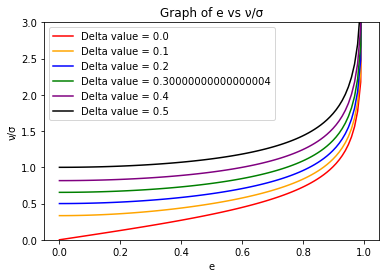

In [3]:
deltavalues = np.linspace(0,0.5,6) #delta values
evalues = np.linspace(1e-4,0.9999,100) #e values

voversigma = [] #Array for v/sigma

colors = ["red","orange","blue","green","purple","black"] #Array of colors

counter = 0 #Counter

for delta in deltavalues:
    voversigma = [] #Array for v/sigma
    for e in evalues:
        oneminusesq = 1 - (e**2) #1 - e^2
        sininve = math.asin(e) #sin^-1(e)
        sininveovere = sininve/e #sin^-1(e)/e
        
        #Wzz/Wxx as in 16.62
        wzzwxx = ((2*oneminusesq)*((1/(math.sqrt(oneminusesq))) - sininveovere))/(sininveovere - math.sqrt(oneminusesq))
        
        vsig = math.sqrt(abs((1/(wzzwxx*(1-delta))) - 1)) #v/sigma as above (I did absolute value because I was running into some floating point errors)
        
        voversigma.append(vsig) #Append to array
    
    plt.plot(evalues,voversigma,color=colors[counter],label = "Delta value = "+str(delta))
    
    counter += 1
plt.xlabel("e")
plt.ylabel("ν/σ")
plt.ylim(0,3)
plt.legend()
plt.title("Graph of e vs ν/σ")
plt.show()

As we can correlate to the corresponding figure from Sande et al. 2017 in the notes, the rise in $\nu / \sigma$ as outlined by the pink line is not extremely gradual for lower values of e (like in the case of $\delta = 0.5$ above). Thus I would expect lower/middle delta values to explain the oblateness of typical elliptical galaxies, close to $\delta \approx 0.0, 0.1$

## Question 2 - The epicycle approximation, Bertrand's theorem, and the mass distribution in the center of the Milky Way.

A useful approximation of the orbits in galaxies,
especially those of disk stars in disk galaxies, is the epicycle
  approximation. In this approximation, one approximates the
gravitational effective potential by Taylor expanding it to second order
\begin{equation}
    \Phi_\mathrm{eff}(R,z;L_z) \approx \Phi_\mathrm{eff}(R_g,0;L_z)
            + \frac{1}{2}\left(\frac{\partial^2 \Phi_\mathrm{eff}}{\partial R^2}\right)\Bigg|_{(R_g,0)}\,(R-R_g)^2
            +\frac{1}{2}\left(\frac{\partial^2 \Phi_\mathrm{eff}}{\partial z^2}\right)\Bigg|_{(R_g,0)}\,z^2\,,
\end{equation}
around the guiding-center radius of a star. This leads to equations of
motion that are
\begin{align}
   \ddot{R} = \ddot{R}-\ddot{R_g} &= -\left(\frac{\partial^2 \Phi_\mathrm{eff}}{\partial R^2}\right)\Bigg|_{(R_g,0)}\,(R-R_g)\,,\\
   \ddot{z} & =  -\left(\frac{\partial^2 \Phi_\mathrm{eff}}{\partial z^2}\right)\Bigg|_{(R_g,0)}\,z\,,
\end{align}
because $\ddot{R}_g = 0$. These are the equations of a decoupled
harmonic oscillator in $(R-R_g,z)$, with frequencies. The first of
these, $\kappa$, is known as the epicycle frequency or as the radial
frequency, while the second is known as the vertical frequency. A
third important frequency is the circular frequency $\Omega(R_g)$,
which is the azimuthal frequency of the circular orbit at $R_g$ and is
therefore $\Omega(R_g)=v_c(R_g)/R_g=L_z/R^2_g$. As shown in Section
10.3 in the notes, the equations of motion can be solved fully
analytically in terms of these frequencies and the initial conditions
and the resulting motion in $(R,\phi)$ is that of motion along an
ellipse whose center is the guiding center, itself orbiting on a
circular around the center. The vertical motion is a simple harmonic
oscillation decoupled from the planar motion.

### Part a

For a flat rotation curve $v_c(R) = $ constant,
compute $\kappa/\Omega$.


#### Answer

From the notes, in Chapter 10 (10.20), we have for the epicycle frequency:

$$\kappa^2(R_g) = \left.\left(\frac{\partial^2 \Phi}{\partial R^2}\right)\right\vert_{(R_g,0)} + 3\frac{L_z^2}{R_g^4}$$

Here, we can substitute in $\Omega$ and get, as in the notes (10.22):

$$\kappa^2(R_g) = \left.\left(R\frac{d \Omega^2}{d R} + 4\Omega^2\right)\right\vert_{R_g}$$

We have from above that $\Omega = v_c(R_g)/R_g$, however, since $v_c$ is constant, we just have $\Omega(R) = v_c/R$.

This we can plug in to the formula above and get:

$$\kappa^2(R) = \left(Rv_c^2\frac{d(1/R^2)}{d R} + 4\Omega^2\right)$$

Derivating the term inside, we get:

$$\kappa^2(R) = \left(-2Rv_c^2\frac{1}{R^3} + 4\Omega^2\right)$$

Which can then be simplified to:

$$\kappa^2(R) = \left(\frac{-2v_c^2}{R^2} + 4\Omega^2\right)$$

But, from before we have $\Omega = v_c/R$, so we get:

$$\kappa^2(R) = \left(-2\Omega^2 + 4\Omega^2\right)$$

Thus, we can divide by $\Omega^2$ and get:

$$\frac{\kappa^2}{\Omega^2} = 2$$

Or:

$$\boxed{\frac{\kappa}{\Omega} = \sqrt{2}}$$

### Part b

Betrand's theorem states that the only mass
distributions for which all orbits close are the (a) point-mass and
(b) homogeneous density sphere. Let's investigate this here and see
what it implies about the mass distribution in the Galactic center.

If all orbits in a mass distribution close, then in particular orbits
that are close to a circular orbit must close. Close-to-circular
orbits are described by the epicycle approximation, so we can use this
approximation to see whether orbits close. Using the epicycle
approximation for spherical mass distributions---the same as that
discussed for disks above, but without the vertical dependence of the
potential---demonstrate that the only gravitational potentials for
which close-to-circular orbits close have $\phi(r) \propto
r^{\beta^2-2}$ where $\beta$ is a rational number (you can start from
the assumption that the potential has a power-law form, because over a
small range of radii, all potentials can be approximated as such).


#### Answer

I will attempt to show this by using the property of closed orbits that for orbits to close, the radial and azimuthal periods must be commensurate. This means that the ratio $T_r/T_{\phi}$ must be of the form $a/b$ where $a, b \in \mathbb{Z}$. First we look at the radial and azimuthal frequencies, as explained in the notes.

First, we look at $\kappa^2$ and $\Omega^2$ as in 10.20:

$$\kappa^2(R) = \left(\frac{\partial \Phi}{\partial R^2}\right) + 3\frac{L_z^2}{R_g^4}$$

$$\Omega^2(R) = \frac{\partial \Phi}{\partial R} \frac{1}{R}$$

If we take the ansatz $\phi(r) \propto r^{\alpha}$, we can see what we get for both $\kappa^2$ and $\Omega^2$:

$$\Omega^2(R) = \alpha r^{\alpha - 2}$$

$$\kappa^2(R) = (\alpha)(\alpha - 1)r^{\alpha - 2} + 3\Omega^2 = (\alpha)(\alpha - 1)r^{\alpha - 2} + 3\alpha r^{\alpha - 2} = (\alpha)(\alpha + 2)r^{\alpha - 2}$$

So, taking the square roots, we have:

$$\kappa = \sqrt{(\alpha)(\alpha + 2)r^{\alpha - 2}}$$

$$\Omega = \sqrt{\alpha r^{\alpha - 2}}$$

Since $T = 1/f$, we have $T_r = 1/\kappa$ and $T_\phi = 1/\Omega$.

So we get for $T_\phi / T_r$:

$$\frac{T_\phi}{T_r} = \sqrt{\alpha + 2}$$

$$\frac{T_\phi}{T_r} = \sqrt{\alpha + 2} = (\alpha + 2)^{1/2}$$

Since we mentioned that for closed orbits, $T_\phi / T_r$ is of the form $b/a$ where $a, b \in \mathbb{Z}$, then we can write:

$$\frac{b}{a} = (\alpha + 2)^{1/2}$$

$$\frac{b^2}{a^2} = \alpha + 2$$

Thus,

$$\alpha = \frac{b^2}{a^2} - 2$$

Since we previously assumed that $a, b \in \mathbb{Z}$, thus $a^2, b^2 \in \mathbb{Z}$.

Thus, if we write $\alpha$ of the form $\beta^2 - 2$, then $\beta$ must be a rational number.

Thus, potentials of the form $\phi(r) \propto r^{\beta^2 - 2}$ would form closed orbits where $\beta$ is a rational number.

### Part c

The form $\phi(r) \propto r^{\beta^2-2}$ with
$\beta$ a rational number includes potentials where $\beta=5/3$ or
$\beta=4/3$. Through explicit orbit integration using galpy,
investigate whether all orbits close in potentials with $\beta =
[1,16/15,5/4,4/3,3/2,11/6,23/12,2]$. What can you conclude?


#### Answer

For each of the values of $\beta$, I'll use the PowerSphericalPotential in galpy. Since from the galpy docs and lecture notes we have that the PowerSphericalPotential is of the form  $r^{2 - \alpha}$, to get it in the form $r^{\beta^2 - 2}$, we must have $\alpha = 4 - \beta^2$, which has been implemented below. 

Since we can Taylor expand the potentials to second and further orders, I'll show two different types of orbits for each value of $\beta$. The first would be unperturbed closed orbits, with $vT = v_{\text{circ}}$, and then add a slight perturbation to $vR$ and $vT$ to show that they are close-to-circular and also close. For simplicity, both orbits would have r = 2.

In [4]:
timestep = np.linspace(0.,300.,10001) #Timesteps

def orbitplotting(betav):
    beta = betav #Beta value, to be changed later
    alphavalue = 4 - (betav)**2 #Initial alpha value to go into the potential
    betapot = potential.PowerSphericalPotential(amp=1.0, alpha=alphavalue, normalize=False, r1=1.0, ro=None, vo=None) #PowerSphericalPotential
    r = 2 #Radius of orbit
    vrnonp = 0 #Unperturbed vR
    vrperturbed = 0.25 #Perturbed vR
    vtnonp = potential.vcirc(betapot,r) #Circular Velocity
    vtperturbed = vtnonp + 0.15 #Perturbed Circular Velocity
    
    orbit1 = Orbit([r, vrnonp, vtnonp, 0]) #Initialize Unperturbed Orbit
    orbit2 = Orbit([r, vrperturbed, vtperturbed, 0]) #Initialize Perturbed Close-To-Circular Orbit
    
    return [orbit1,orbit2,betapot] #Return orbits and potential

#### $\beta$ = 1, Unperturbed

Unperturbed Closed Orbit for Beta =  1
Ratio of the radial and azimuthal period =  1.0


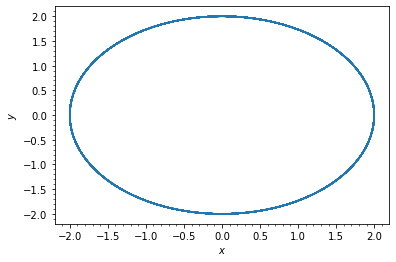

In [5]:
betanumber = 1 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbit.integrate(timestep, betapotl) #Integrate Unperturbed Orbit

ratio = orbit.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Unperturbed Closed Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbit.plot() #Plot Orbit
orbit.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 1, Perturbed

Perturbed Closed Orbit for Beta =  1
Ratio of the radial and azimuthal period =  0.9999999993999333


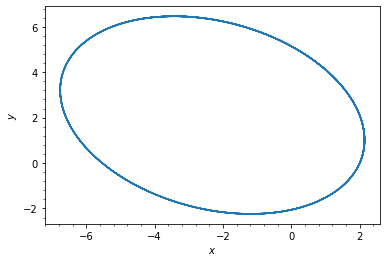

In [6]:
betanumber = 1 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbitp.integrate(timestep, betapotl) #Integrate Perturbed Orbit

ratio = orbitp.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Perturbed Closed Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbitp.plot() #Plot Orbit
orbitp.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 16/15, Unperturbed

Unperturbed Closed Orbit for Beta =  1.0666666666666667
Ratio of the radial and azimuthal period =  0.9374999999999997


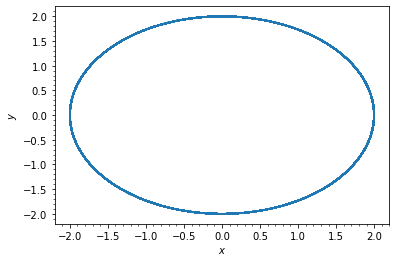

In [7]:
betanumber = 16/15 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbit.integrate(timestep, betapotl) #Integrate Unperturbed Orbit

ratio = orbit.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Unperturbed Closed Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbit.plot() #Plot Orbit
orbit.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 16/15, Perturbed

Perturbed Close-To-Circular Orbit for Beta =  1.0666666666666667
Ratio of the radial and azimuthal period =  0.9374608889275816


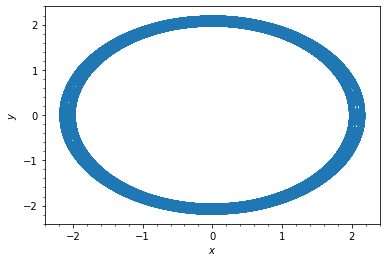

In [8]:
betanumber = 16/15 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbitp.integrate(timestep, betapotl) #Integrate Perturbed Orbit

ratio = orbitp.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Perturbed Close-To-Circular Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbitp.plot() #Plot Orbit
orbitp.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 5/4, Unperturbed

Unperturbed Closed Orbit for Beta =  1.25
Ratio of the radial and azimuthal period =  0.8


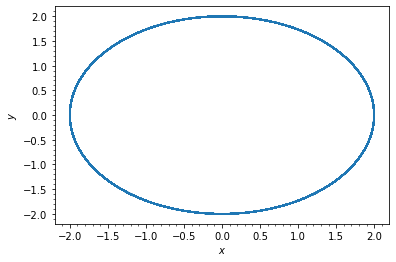

In [9]:
betanumber = 5/4 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbit.integrate(timestep, betapotl) #Integrate Unperturbed Orbit

ratio = orbit.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Unperturbed Closed Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbit.plot() #Plot Orbit
orbit.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 5/4, Perturbed

Perturbed Close-To-Circular Orbit for Beta =  1.25
Ratio of the radial and azimuthal period =  0.7997844067392481


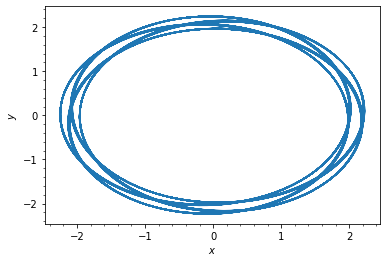

In [10]:
betanumber = 5/4 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbitp.integrate(timestep, betapotl) #Integrate Perturbed Orbit

ratio = orbitp.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Perturbed Close-To-Circular Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbitp.plot() #Plot Orbit
orbitp.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 4/3, Unperturbed

Unperturbed Closed Orbit for Beta =  1.3333333333333333
Ratio of the radial and azimuthal period =  0.75


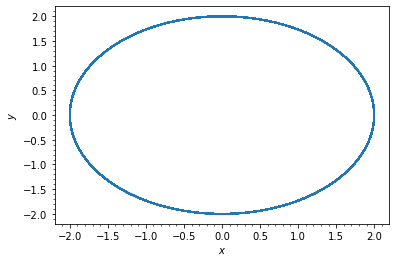

In [11]:
betanumber = 4/3 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbit.integrate(timestep, betapotl) #Integrate Unperturbed Orbit

ratio = orbit.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Unperturbed Closed Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbit.plot() #Plot Orbit
orbit.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 4/3, Perturbed

Perturbed Close-To-Circular Orbit for Beta =  1.3333333333333333
Ratio of the radial and azimuthal period =  0.7497511010302085


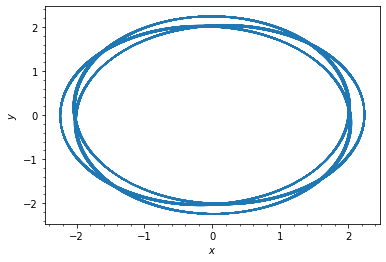

In [12]:
betanumber = 4/3 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbitp.integrate(timestep, betapotl) #Integrate Perturbed Orbit

ratio = orbitp.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Perturbed Close-To-Circular Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbitp.plot() #Plot Orbit
orbitp.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 3/2, Unperturbed

Unperturbed Closed Orbit for Beta =  1.50000001
Ratio of the radial and azimuthal period =  0.6666666622222224


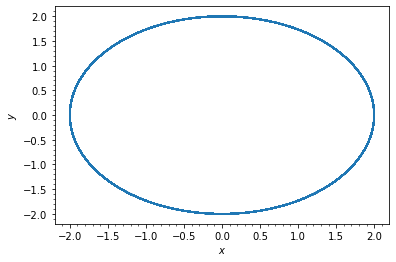

In [13]:
betanumber = 3/2+(0.00000001) #Define Beta (added the plus amount to avoid division by zero)

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbit.integrate(timestep, betapotl) #Integrate Unperturbed Orbit

ratio = orbit.TrTp(pot = betapotl)/math.pi  #Get ratio of radial and azimuthal periods

print("Unperturbed Closed Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbit.plot() #Plot Orbit
orbit.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 3/2, Perturbed

Perturbed Close-To-Circular Orbit for Beta =  1.5
Ratio of the radial and azimuthal period =  0.6664384020194318


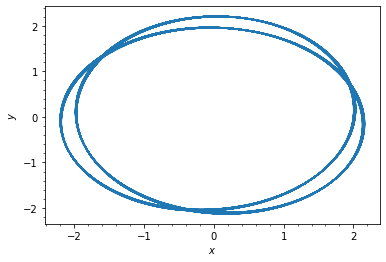

In [14]:
betanumber = 3/2 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbitp.integrate(timestep, betapotl) #Integrate Perturbed Orbit

ratio = orbitp.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Perturbed Close-To-Circular Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbitp.plot() #Plot Orbit
orbitp.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 11/6, Unperturbed

Unperturbed Closed Orbit for Beta =  1.8333333433333332
Ratio of the radial and azimuthal period =  0.5454545424793389


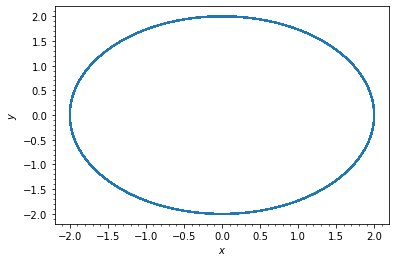

In [15]:
betanumber = 11/6 + (0.00000001) #Define Beta (added the plus amount to avoid division by zero)

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbit.integrate(timestep, betapotl) #Integrate Unperturbed Orbit

ratio = orbit.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Unperturbed Closed Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbit.plot() #Plot Orbit
orbit.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 11/6, Perturbed

Perturbed Close-To-Circular Orbit for Beta =  1.8333333333333333
Ratio of the radial and azimuthal period =  0.545390178475823


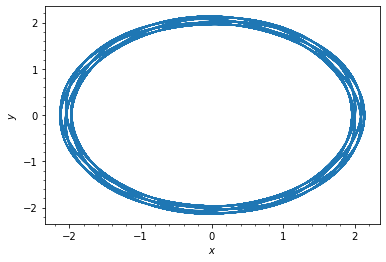

In [16]:
betanumber = 11/6 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbitp.integrate(timestep, betapotl) #Integrate Perturbed Orbit

ratio = orbitp.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Perturbed Close-To-Circular Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbitp.plot() #Plot Orbit
orbitp.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 23/12, Unperturbed

Unperturbed Closed Orbit for Beta =  1.9166666666666667
Ratio of the radial and azimuthal period =  0.5217391304347825


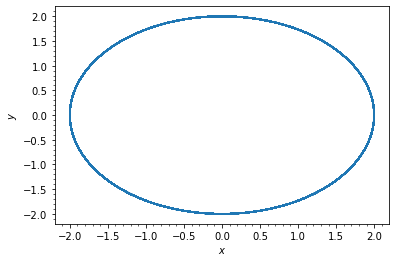

In [17]:
betanumber = 23/12 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbit.integrate(timestep, betapotl) #Integrate Unperturbed Orbit

ratio = orbit.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Unperturbed Closed Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbit.plot() #Plot Orbit
orbit.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 23/12, Perturbed

Perturbed Close-To-Circular Orbit for Beta =  1.9166666666666667
Ratio of the radial and azimuthal period =  0.5217102299227464


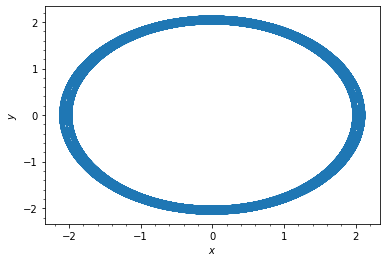

In [18]:
betanumber = 23/12 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbitp.integrate(timestep, betapotl) #Integrate Perturbed Orbit

ratio = orbitp.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Perturbed Close-To-Circular Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbitp.plot() #Plot Orbit
orbitp.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 2, Unperturbed

Unperturbed Closed Orbit for Beta =  2
Ratio of the radial and azimuthal period =  0.5


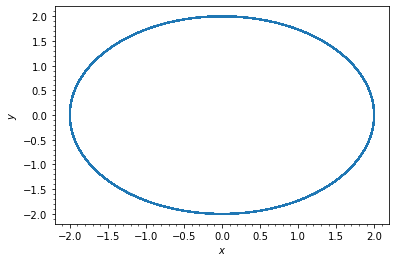

In [19]:
betanumber = 2 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbit.integrate(timestep, betapotl) #Integrate Unperturbed Orbit

ratio = orbit.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Unperturbed Closed Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbit.plot() #Plot Orbit
orbit.animate(staticPlot=True) #Plot Orbit Animation

#### $\beta$ = 2, Perturbed

Perturbed Closed Orbit for Beta =  2
Ratio of the radial and azimuthal period =  0.49999999598263045


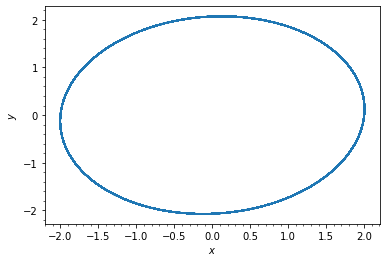

In [20]:
betanumber = 2 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbitp.integrate(timestep, betapotl) #Integrate Perturbed Orbit

ratio = orbitp.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Perturbed Closed Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbitp.plot() #Plot Orbit
orbitp.animate(staticPlot=True) #Plot Orbit Animation

As can be seen above, if $vT$ is set to be the circular velocity, we get orbits that close for all values of $\beta$. However, by perturbing the orbits, we see that for all values of $\beta$, the orbits are close to circular and do close, agreeing with Bertrand's Theorem. These slight perturbations do affect the orbits but as can be seen in the animations, they close, whether they are close-to-circular or circular orbits. Another thing I noted was that even though slight perturbations led to close-to-circular orbits for most values of $\beta$, it can be noted that for $\beta = 1$ and $\beta = 2$, the orbits simply close. This can be viewed in the animations and plots above. That is because for $\beta = 1$, we have $\phi(r) \propto r^{-1}$, which corresponds to a point-like or Kepler potential, and for $\beta = 2$, we have $\phi(r) \propto r^{2}$, which corresponds to a homogeneous sphere potential. Thus, from here, it can be concluded that if $\phi(r) \propto r^{\beta^2 - 2}$, then this potential would yield close-to-circular orbits if $\beta$ is a rational number. Further discussion will be done on the ratio of the radial and azimuthal periods in part d. Before that, I will try one last value of $\beta$, $\beta = \pi/3$. We can then see how the orbit doesn't close but instead goes on to fill up the space in the annulus between its minimum and maximum potential, showing it would go through all the points and won't close.

#### $\beta = \frac{\pi}{3}$, Perturbed

Perturbed Orbit for Beta =  1.0471975511965976
Ratio of the radial and azimuthal period =  0.9549080305326267


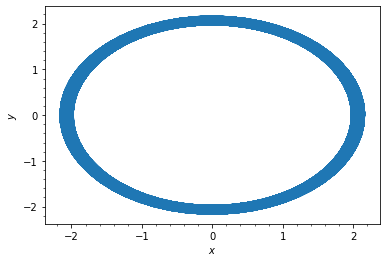

In [21]:
betanumber = math.pi/3 #Define Beta

orbit, orbitp, betapotl = orbitplotting(betanumber) #Get Orbits and Potential

orbitp.integrate(timestep, betapotl) #Integrate Perturbed Orbit

ratio = orbitp.TrTp(pot = betapotl)/math.pi #Get ratio of radial and azimuthal periods

print("Perturbed Orbit for Beta = ",betanumber) #Print Title
print("Ratio of the radial and azimuthal period = ",ratio) #Print ratio of radial and azimuthal periods

orbitp.plot() #Plot Orbit
orbitp.animate(staticPlot=True) #Plot Orbit Animation

### Part d

Now numerically show that what you claim in (c) is
correct by explicitly calculating the radial and azimuthal periods of
well-chosen orbits in each of these potentials.


#### Answer
I can show what I claim in (c) by showing the ratio of the radial and azimuthal periods of such orbits. In the case of all of the orbits with their respective circular velocity, it can be shown that the ratio of  radial and azimuthal periods are $1/\beta$. This can be seen at the top of all of the orbit plots. Since we had values of $\beta$ that were rational numbers, the ratio of $T_r/T_\phi = 1/\beta$ is also a rational number. That satisfies the condition mentioned in part b, where if the radial and azimuthal periods are commensurate, the orbits would be closed.

When I perturbed the orbits, again it can be seen that the orbits did close, and $|T_r/T_\phi - 1/\beta| \approx 0$. The ratio of the radial and azimuthal periods were again very close to commensurate and that shows again that these close-to-circular orbits would close.

The last case I did showed an example where the periods were not commensurate, where $\beta = \pi/3$. In this case, we could see that the orbits did not close, which aligns with the claim that orbits would close if we have commensurate periods, or if our potential is of the form $\phi(r) \propto r^{\beta^2 - 2}$, where $\beta$ is a rational number.

### Part e

In the Galactic center, we can observe (partial)
orbits of the so-called ``S stars''. In particular, the orbit of the
star S2 (or S0-2 depending on who you ask) has been observed through a
full azimuthal period and its orbit closes to within the
uncertainties. While there are closed orbits in many potentials, the
fact that the one orbit that we observe closes (and which is not
circular) is good evidence that all orbits close in the mass
distribution that S2 is orbiting in. From Bertrand's theorem we know
that this means that the mass distribution is dominated either by a
massive point-like object or that it is homogeneous. These are quite
different mass distributions! Discuss what kinds of observations of
the S stars could distinguish between these two possibilities.


#### Answer

As can be observed in the above calculations and plots, one of the most important calculations would be to check the ratio of the radial and azimuthal periods. Since it can be seen that for closed orbits we would want the ratio of $T_r/T_\phi \approx 1/\beta$, where $\beta = 1$ for a point-like potential or $\beta = 2$ for a homogeneous sphere potential, and accordingly for the mass distributions. Another things that can be noted along with that are the orbits themselves. As can be seen in the perturbed plots, the orbit in the point-like mass distribution covers a greater range of radii than the perturbed plot in the homogeneous sphere-like mass distribution. As described in our readings, this shows that even though both orbits are closed ellipses, the origin for the homogeneous sphere distribution orbit is at the center of the ellipse while the origin for the point-like distribution orbit is at the focus. These two observations can help determine the kind of mass distribution and distinguish between the two main possibilities.